# Examen


El presente ejercicio es similar al caso práctico de repaso de optimización de campañas de marketing online ya realizado y lo que se pretende con este es asentar los conceptos relativos al algoritmo del bandido multibrazo, como son las ratios de explotación y exploración para la optimización de una campaña de marketing online. 


Al igual que en el caso práctico de repaso, se tiene que hacer una campaña de marketing online para promocionar un determinado producto con la que se mostrará en una página web un banner con una imagen del producto que promocionar. Se han realizado cinco imágenes distintas del producto para poner en el banner con el objetivo de captar la atención del usuario para que pulse en el banner y acceda a la web con los detalles del producto que promocionar, pero, a diferencia del caso práctico de repaso, los resultados obtenidos serán diferentes, siendo otra imagen la que mayor valor de Q tenga calculado a partir de la siguiente fórmula:


$$Q(imagen_i) = \frac{Nº Clicks}{Nº impresiones de la pagina}$$


Sin saber a priori cuál es la imagen que captará mayor atención, se debe aprender con base en los clicks que se realizan sobre el banner qué imagen será las más llamativa y conseguirá más visitas aplicando el método del bandido multibrazo. 


El objetivo es encontrar la imagen que capte mayor atención de los usuarios, es decir que mayor número de clicks obtenga: 

Dado el método ya implementado en el notebook “multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False)”, se pide, modificando el valor de épsilon, responder a las siguientes preguntas para asentar los conceptos relativos al aprendizaje por refuerzo y, en particular, al algoritmo del bandido multibrazo:

1. ¿Cuáles el valor de épsilon que maximiza la imagen con mayor número de clicks?**

2. ¿Cuáles la imagen que más clicks obtiene y cuántos? 

3. Poniendo una ratio de explotación del 100%, ¿Qué resultado se obtiene?

In [1]:
import random
import numpy as np


def gen_bandits():

    bandits = [0.1, 0.2, 0.2, 0.5, 0.7]
    random.shuffle(bandits)
    return bandits
 
    
def multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False):
    
    bandits = gen_bandits()
    total_reward = 0
    acum_reward_bandit = np.zeros(len(bandits))  # numerador
    num_selected_bandit = np.zeros(len(bandits)) # denominador
    q_bandits = np.zeros(len(bandits))            # Q(a)
    
    if verbose:
        print("Initial Bandits Distribution\n  {}".format(bandits))
    
    for game in range(0,num_games):
        
        # Copia de los Q(a)
        old_q_bandits = q_bandits.copy()
        
        # Selección "tragaperras"
        if np.random.random() < epsilon:
            bandit = np.random.randint(len(bandits)) # Exploro
        else:
            bandit = np.random.choice(np.flatnonzero(q_bandits == q_bandits.max())) # Exploto 
            
        # Obtención reward
        reward = 1 if (np.random.random() < bandits[bandit]) else 0
        
        # Actualización reward total
        total_reward += reward
        
        # Actualización valor (Q) de la "tragaperras"
        acum_reward_bandit[bandit] += reward
        num_selected_bandit[bandit] += 1
        q_bandits[bandit] = acum_reward_bandit[bandit] / num_selected_bandit[bandit]
        
        if verbose:
            print("\nGAME {game}\n  Old Q_Bandits = {old_q_bandits}\n  Selected Bandit = {bandit} \
                  \n  Reward = {reward}\n  Q_Bandits = {q_bandits}"
                  .format(game=game+1, old_q_bandits=old_q_bandits, bandit=bandit, 
                          reward=reward, q_bandits=q_bandits))
    
    return bandits, total_reward, q_bandits, num_selected_bandit


### 1. ¿Cuáles el valor de épsilon que maximiza la imagen con mayor número de clicks? 


**RESPUESTA:**

* El valor debería de ser entorno a 0.1 [0.05-0.2] serian valores válidos

* Realizamos una ejecución con un ratio de exploración de un 10% ($\epsilon = 0.1$)

Initial Bandits Distribution
  [0.2, 0.2, 0.7, 0.1, 0.5]
Bandits Distribution games
  [ 21.  19. 851.  24.  85.]
Q(a) Bandits
  [0.1429 0.2632 0.6839 0.     0.5765]
Reward: 639


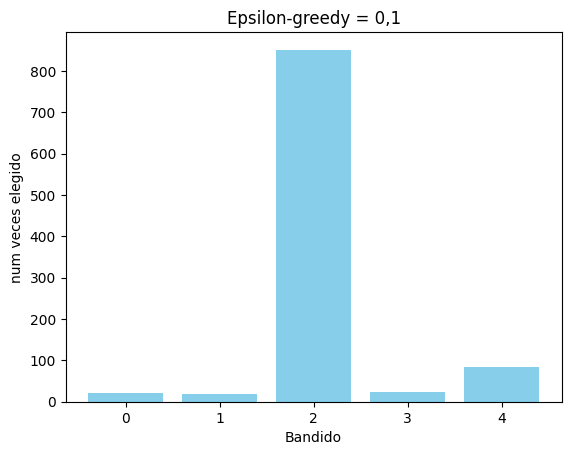

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4)


bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=0.1, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("Reward: {}".format(total_reward))

# Representación gráfica del número de veces que se elige cada "tragaperras"
plt.title('Epsilon-greedy = 0,1')
plt.bar(range(0,len(bandits)), num_selected_bandit, color='skyblue')
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

### 2. ¿Cuáles la imagen que más clicks obtiene y cuántos?


**RESPUESTA:**

* Es la imagen C (en la gráfica la imagen 2) con un número de clicks que debe de rondar entorno a 600-650.

### 3. Poniendo una ratio de explotación del 100%, ¿Qué resultado se obtiene? 

Initial Bandits Distribution
  [0.2, 0.1, 0.7, 0.5, 0.2]
Bandits Distribution games
  [  1.   1.   0. 997.   1.]
Q(a) Bandits
  [0.     0.     0.     0.4995 0.    ]
Reward: 498


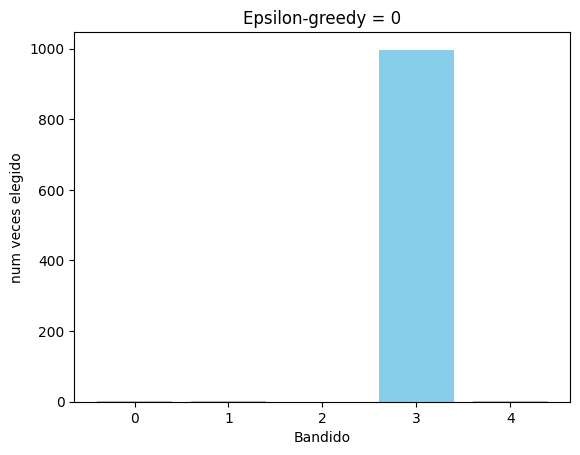

In [3]:
bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=0.0, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("Reward: {}".format(total_reward))

# Representación gráfica del número de veces que se elige cada "tragaperras"
plt.title('Epsilon-greedy = 0')
plt.bar(range(0,len(bandits)), num_selected_bandit, color='skyblue')
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

**RESPUESTA:**

* Un ratio de explotación del 100% conlleva un ratio de exploración del 0% (épsilon = 0), es decir, no se explora. Como resultado, se seleccionan de manera aleatoria una imagen hasta que una de ellas sea la primera en obtener un click. Una vez que esa haya obtenido recompensa, siempre se mostrará la misma imagen explotando toda la información obtenida.

*  En este caso, la primera imagen de la que se obtiene un clik es la imagen D (en la gráfica la imagen 3), que no es necesariamente de la que se consigue una mayor recompensa.